In [2]:
import pandas as pd

In [3]:
import json


In [4]:
import plotly.express as px
import plotly.graph_objects as go


In [5]:
import matplotlib.pyplot as plt


In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
import os
import seaborn as sns

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
df = pd.read_csv('Hackathon_Ideal_Data.csv')

In [12]:
print(df.head())

  MONTH STORECODE  QTY  VALUE                GRP               SGRP  \
0    M1        P1   25     83  HAIR CONDITIONERS  HAIR CONDITIONERS   
1    M1        P1    6     22  HAIR CONDITIONERS  HAIR CONDITIONERS   
2    M1        P1    4     15  HAIR CONDITIONERS  HAIR CONDITIONERS   
3    M1        P1   15     60  HAIR CONDITIONERS  HAIR CONDITIONERS   
4    M1        P2    0      0  HAIR CONDITIONERS  HAIR CONDITIONERS   

               SSGRP                         CMP         MBRD  \
0  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED         DOVE   
1  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED         DOVE   
2  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED         DOVE   
3  HAIR CONDITIONERS               L'OREAL INDIA      GARNIER   
4  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED  CLINIC PLUS   

                     BRD  
0  DOVE HAIR FALL RESCUE  
1    DOVE INTENSE REPAIR  
2   DOVE OXYGEN MOISTURE  
3                FRUCTIS  
4            CLINIC PLUS  


In [13]:
df

,MONTH,STORECODE,QTY,VALUE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,P1,25,83,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE HAIR FALL RESCUE
1,M1,P1,6,22,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE INTENSE REPAIR
2,M1,P1,4,15,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE OXYGEN MOISTURE
3,M1,P1,15,60,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,L'OREAL INDIA,GARNIER,FRUCTIS
4,M1,P2,0,0,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,CLINIC PLUS,CLINIC PLUS
...,...,...,...,...,...,...,...,...,...,...
14255,M3,P10,0,0,SUGAR SUBSTITUTE (11/05),POWDER (SUGAR SUBST),POWDER (SUGAR SUBST),ZYDUS WELLNESS LTD,SUGAR FREE,SUGAR FREE GOLD
14256,M3,P8,1,62,SUGAR SUBSTITUTE (11/05),PELLETS (SUGAR SUBST),PELLETS (SUGAR SUBST),ZYDUS WELLNESS LTD,SUGAR FREE,SUGAR FREE GOLD
14257,M1,P6,0,0,SUGAR SUBSTITUTE (11/05),PELLETS (SUGAR SUBST),PELLETS (SUGAR SUBST),ZYDUS WELLNESS LTD,SUGAR FREE,SUGAR FREE GOLD
14258,M1,P10,0,0,SUGAR SUBSTITUTE (11/05),POWDER (SUGAR SUBST),POWDER (SUGAR SUBST),ZYDUS WELLNESS LTD,SUGAR FREE,SUGAR FREE GOLD


In [36]:
numeric_summary = df.describe()
print(numeric_summary)

                QTY         VALUE
count  14260.000000  14260.000000
mean      16.354488    294.455330
std       34.365583    760.129558
min        0.000000      0.000000
25%        1.000000     10.000000
50%        4.000000     99.000000
75%       16.000000    283.000000
max      641.000000  24185.000000


In [37]:
categorical_summary = df.describe(include='object')
print(categorical_summary)

        MONTH STORECODE             GRP     SGRP    SSGRP  \
count   14260     14260           14260    14260    14260   
unique      3        10              80      177      242   
top        M2        P8  SPICES (03/04)  BLENDED  PREMIUM   
freq     4816      2642            1683     1214      793   

                               CMP     MBRD      BRD  
count                        14260    14260    14260  
unique                         512      818     1613  
top     HINDUSTAN UNILEVER LIMITED  EVEREST  EVEREST  
freq                          2307      583      504  


In [8]:
df.tail()

,MONTH,STORECODE,QTY,VALUE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
14255,M3,P10,0,0,SUGAR SUBSTITUTE (11/05),POWDER (SUGAR SUBST),POWDER (SUGAR SUBST),ZYDUS WELLNESS LTD,SUGAR FREE,SUGAR FREE GOLD
14256,M3,P8,1,62,SUGAR SUBSTITUTE (11/05),PELLETS (SUGAR SUBST),PELLETS (SUGAR SUBST),ZYDUS WELLNESS LTD,SUGAR FREE,SUGAR FREE GOLD
14257,M1,P6,0,0,SUGAR SUBSTITUTE (11/05),PELLETS (SUGAR SUBST),PELLETS (SUGAR SUBST),ZYDUS WELLNESS LTD,SUGAR FREE,SUGAR FREE GOLD
14258,M1,P10,0,0,SUGAR SUBSTITUTE (11/05),POWDER (SUGAR SUBST),POWDER (SUGAR SUBST),ZYDUS WELLNESS LTD,SUGAR FREE,SUGAR FREE GOLD
14259,M1,P8,1,62,SUGAR SUBSTITUTE (11/05),PELLETS (SUGAR SUBST),PELLETS (SUGAR SUBST),ZYDUS WELLNESS LTD,SUGAR FREE,SUGAR FREE GOLD


In [9]:
print("There are {} missing values in the data.".format(df.isna().sum().sum())) 


There are 0 missing values in the data.


In [14]:
df.describe()

,QTY,VALUE
count,14260.000000,14260.000000
mean,16.354488,294.455330
std,34.365583,760.129558
min,0.000000,0.000000
25%,1.000000,10.000000
50%,4.000000,99.000000
75%,16.000000,283.000000
max,641.000000,24185.000000


In [46]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
QTY,14260.0,16.354488,34.365583,0.0,1.0,4.0,16.0,641.0
VALUE,14260.0,294.455330,760.129558,0.0,10.0,99.0,283.0,24185.0


In [47]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
MONTH,14260,3,M2,4816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
STORECODE,14260,10,P8,2642,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QTY,14260.0,NaN,NaN,NaN,16.354488,34.365583,0.0,1.0,4.0,16.0,641.0
VALUE,14260.0,NaN,NaN,NaN,294.45533,760.129558,0.0,10.0,99.0,283.0,24185.0
GRP,14260,80,SPICES (03/04),1683,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SGRP,14260,177,BLENDED,1214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SSGRP,14260,242,PREMIUM,793,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CMP,14260,512,HINDUSTAN UNILEVER LIMITED,2307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MBRD,14260,818,EVEREST,583,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BRD,14260,1613,EVEREST,504,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
(df.isnull().sum()/(len(df)))*100


MONTH        0.0
STORECODE    0.0
QTY          0.0
VALUE        0.0
GRP          0.0
SGRP         0.0
SSGRP        0.0
CMP          0.0
MBRD         0.0
BRD          0.0
dtype: float64

In [10]:
df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14260 entries, 0 to 14259
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MONTH      14260 non-null  object
 1   STORECODE  14260 non-null  object
 2   QTY        14260 non-null  int64 
 3   VALUE      14260 non-null  int64 
 4   GRP        14260 non-null  object
 5   SGRP       14260 non-null  object
 6   SSGRP      14260 non-null  object
 7   CMP        14260 non-null  object
 8   MBRD       14260 non-null  object
 9   BRD        14260 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.1+ MB


In [6]:
df.shape


(14260, 10)

In [7]:
df.columns

Index(['MONTH', 'STORECODE', 'QTY', 'VALUE', 'GRP', 'SGRP', 'SSGRP', 'CMP',
       'MBRD', 'BRD'],
      dtype='object')

In [16]:
df.nunique()

MONTH           3
STORECODE      10
QTY           258
VALUE        1606
GRP            80
SGRP          177
SSGRP         242
CMP           512
MBRD          818
BRD          1613
dtype: int64

In [10]:
df['MONTH'].unique()

array(['M1', 'M3', 'M2'], dtype=object)

In [11]:
#cleaning
df.isnull().sum()

MONTH        0
STORECODE    0
QTY          0
VALUE        0
GRP          0
SGRP         0
SSGRP        0
CMP          0
MBRD         0
BRD          0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14260 entries, 0 to 14259
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MONTH      14260 non-null  object
 1   STORECODE  14260 non-null  object
 2   QTY        14260 non-null  int64 
 3   VALUE      14260 non-null  int64 
 4   GRP        14260 non-null  object
 5   SGRP       14260 non-null  object
 6   SSGRP      14260 non-null  object
 7   CMP        14260 non-null  object
 8   MBRD       14260 non-null  object
 9   BRD        14260 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.1+ MB


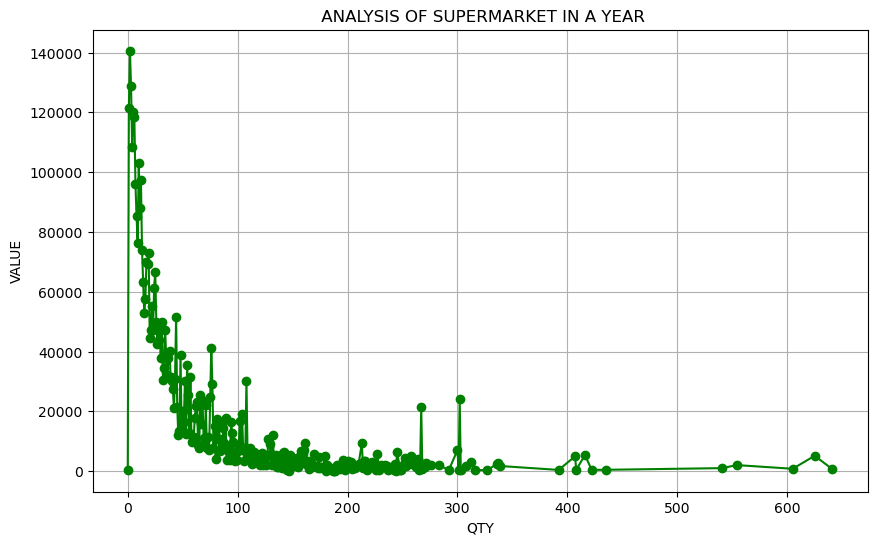

In [50]:
yearly_totals = df.groupby('QTY')['VALUE'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_totals['QTY'], yearly_totals['VALUE'], marker='o', linestyle='-', color='green')
plt.title(' ANALYSIS OF SUPERMARKET IN A YEAR')
plt.xlabel('QTY')
plt.ylabel('VALUE')
plt.grid(True)
plt.show()

<Axes: >

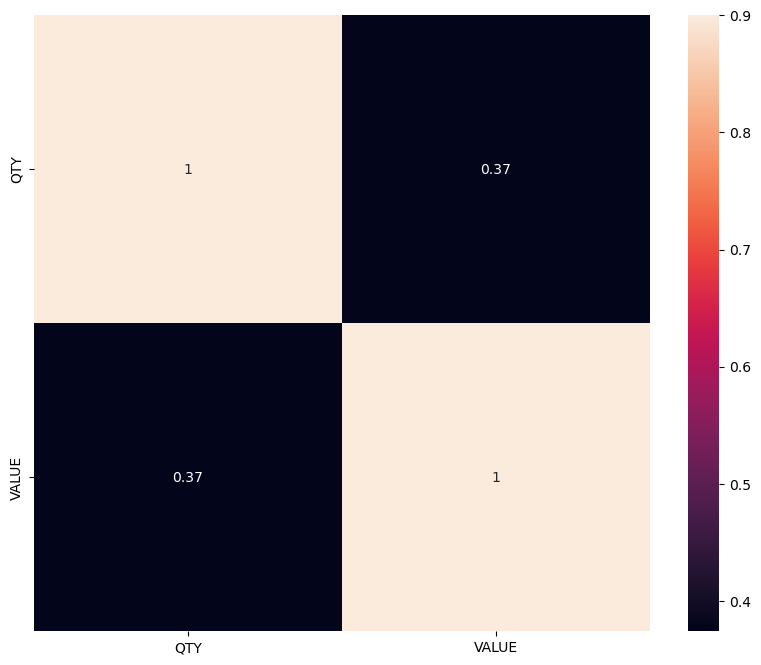

In [37]:
#heatmap_corelation
cm = df[['QTY', 'VALUE']].corr()
f, ax = plt.subplots(figsize = (10,8))
sns.heatmap(cm, vmax=0.9, square = True, annot = True)

In [28]:

total_sales_by_category = df.groupby('GRP')['QTY'].sum().reset_index()

TOP_5_SALES = total_sales_by_category.sort_values(by='QTY', ascending=False).head(5)

print(TOP_5_SALES)



                           GRP    QTY
10  BISCUITS - CORE & NON CORE  35375
60         SALTY SNACKS (2/97)  26007
68              SPICES (03/04)  25179
63       SHAMPOO - BY SEGMENTS  17636
29        DETERGENT CAKES/BARS  11819


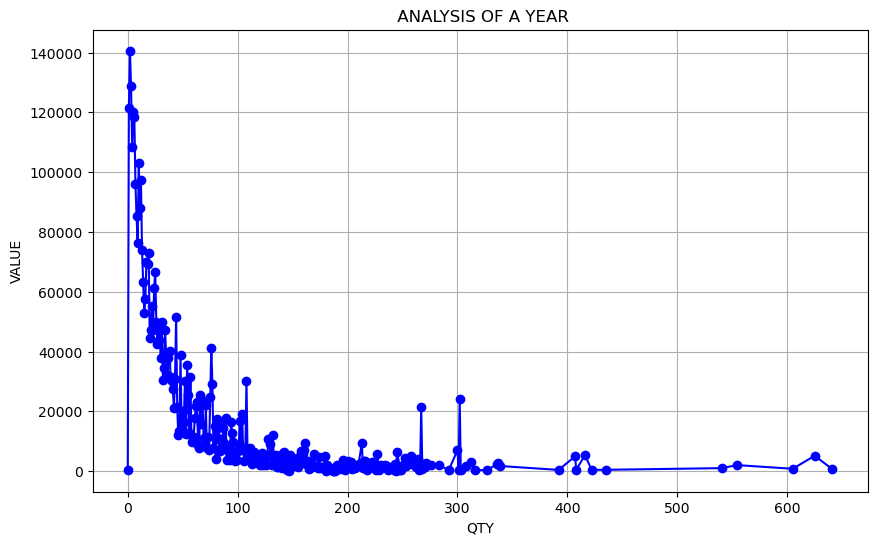

In [33]:


yearly_totals = df.groupby('QTY')['VALUE'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_totals['QTY'], yearly_totals['VALUE'], marker='o', linestyle='-', color='blue')
plt.title(' ANALYSIS OF A YEAR')
plt.xlabel('QTY')
plt.ylabel('VALUE')
plt.grid(True)
plt.show()



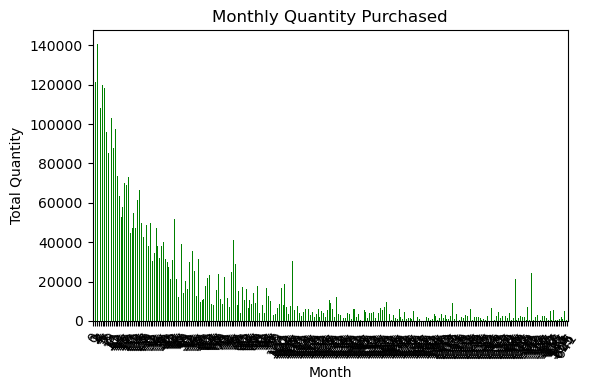

In [51]:
monthly_quantity = df.groupby(df['QTY'])['VALUE'].sum()
plt.figure(figsize=(6, 4))
monthly_quantity.plot(kind='bar', color='green')
plt.title('Monthly Quantity Purchased')
plt.xlabel('Month')
plt.xticks(rotation=55)
plt.ylabel('Total Quantity')
plt.tight_layout()
plt.show()

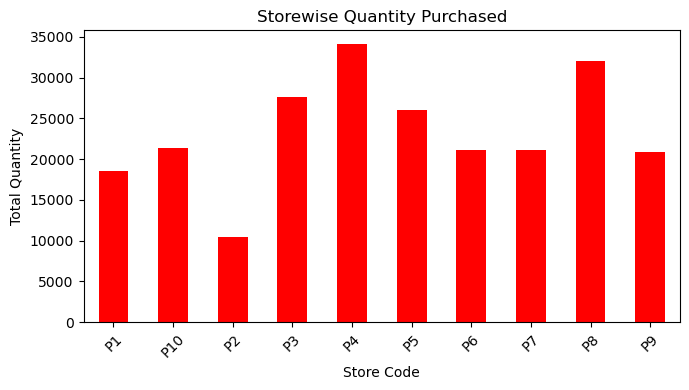

In [32]:
##STORE WISE QUANTITY PURCHASED

#Group by month and sum the quantity--- chart visualization
monthly_quantity = df.groupby(df['STORECODE'])['QTY'].sum()
plt.figure(figsize=(7, 4))
monthly_quantity.plot(kind='bar', color='red')
plt.title('Storewise Quantity Purchased')
plt.xlabel('Store Code')
plt.xticks(rotation=45)
plt.ylabel('Total Quantity')
plt.tight_layout()
plt.show()

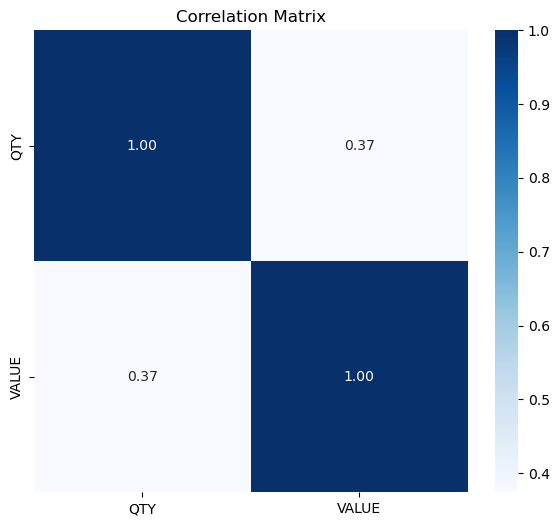

In [37]:
###CORRELATION MATRIX
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(7, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [40]:
###MOST PURCHASED ITEM 

#--grouping columns
item_quantity = df.groupby(['GRP', 'SGRP', 'SSGRP'])['QTY'].sum()

# Sort items by total quantity in descending order
item_quantity_sorted = item_quantity.sort_values(ascending=False)

#most purchase item display
most_purchased_item = item_quantity_sorted.index[0]
most_purchased_item = ' - '.join(most_purchased_item)
print("\nmost_purchased_item:\n", most_purchased_item)


most_purchased_item:
 SHAMPOO - BY SEGMENTS - SACHETS - SACHETS


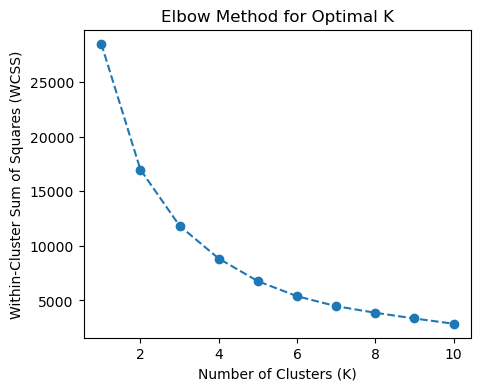

In [43]:
###CLUSTERING ANALYSIS

#df of num_cols alone
numeric_columns = ['QTY', 'VALUE']  
df_numeric = df[numeric_columns]
df_numeric = df_numeric.fillna(df_numeric.mean()) #missing val of num_cols

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_numeric)

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method to choose the optimal number of clusters
plt.figure(figsize=(5, 4))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [54]:
df1= pd.read_csv('Hackathon_Working_Data.csv')

In [55]:
df1

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY
2,M1,N1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS
3,M1,N1,4,T382,108.0,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT
4,M1,N1,4,T384,19.0,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26980,M3,N10,31,T5999,10.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,NON-SALT CRACKER,NON-SALT CRACKER,PARLE PRODS,PARLE KRACK JACK,PARLE KRACK JACK
26981,M3,N10,31,T6007,88.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,MARIE,MARIE,PARLE PRODS,PARLE MARIE,PARLE MARIE
26982,M3,N10,31,T6007,88.0,2.0,20.0,10.0,BISCUITS - CORE & NON CORE,GLUCOSE,GLUCOSE,PARLE PRODS,PARLE-G,PARLE-G
26983,M3,N10,31,T6007,88.0,1.0,58.0,58.0,CLEANERS - GLASS,LIQUIDS,LIQUIDS,RECKITT BENCKISER,COLIN,COLIN


In [56]:
#BASIC EDA
#info dataset
print("Dimension of dataset:", df1.shape)
print(df1.info())

Dimension of dataset: (26985, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26985 entries, 0 to 26984
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MONTH      26985 non-null  object 
 1   STORECODE  26985 non-null  object 
 2   DAY        26985 non-null  int64  
 3   BILL_ID    26985 non-null  object 
 4   BILL_AMT   26985 non-null  float64
 5   QTY        26985 non-null  float64
 6   VALUE      26985 non-null  float64
 7   PRICE      26985 non-null  float64
 8   GRP        26985 non-null  object 
 9   SGRP       26985 non-null  object 
 10  SSGRP      26985 non-null  object 
 11  CMP        26985 non-null  object 
 12  MBRD       26985 non-null  object 
 13  BRD        26985 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 2.9+ MB
None


In [57]:
#sample dataset
print("Sample Dataset")
print(df1.head())

Sample Dataset
  MONTH STORECODE  DAY BILL_ID  BILL_AMT  QTY  VALUE  PRICE  \
0    M1        N1    4    T375     225.0  1.0  225.0  225.0   
1    M1        N1    4    T379      95.0  1.0   95.0   95.0   
2    M1        N1    4    T381      10.0  1.0   10.0   10.0   
3    M1        N1    4    T382     108.0  1.0  108.0  108.0   
4    M1        N1    4    T384      19.0  1.0   19.0   19.0   

                       GRP                     SGRP                    SSGRP  \
0     BUTTER MARGR  (4/94)                   BUTTER                   SALTED   
1  CONFECTIONERY - ECLAIRS  CONFECTIONERY - ECLAIRS  CONFECTIONERY - ECLAIRS   
2                CHOCOLATE         CHOCOLATE PANNED         CHOCOLATE PANNED   
3             PACKAGED TEA               MAIN PACKS               MAIN PACKS   
4         ALL IODISED SALT            POWDERED SALT            POWDERED SALT   

                      CMP           MBRD                 BRD  
0               G C M M F           AMUL                AMUL  

In [49]:
#summary
print(df1.describe())

                DAY      BILL_AMT           QTY         VALUE         PRICE
count  26985.000000  26985.000000  26985.000000  26985.000000  26985.000000
mean      15.167019    278.754206      4.105021     67.808551     52.812982
std        8.956057    541.398504     95.666947    118.005978     84.987730
min        1.000000      0.000000      0.500000      0.000000      0.000000
25%        7.000000     40.000000      1.000000     10.000000     10.000000
50%       14.000000    111.000000      1.000000     30.000000     22.000000
75%       23.000000    280.000000      2.000000     80.000000     64.000000
max       31.000000   7292.000000  12000.000000   3150.000000   3150.000000


In [58]:
df1.describe().T


,count,mean,std,min,25%,50%,75%,max
DAY,26985.0,15.167019,8.956057,1.0,7.0,14.0,23.0,31.0
BILL_AMT,26985.0,278.754206,541.398504,0.0,40.0,111.0,280.0,7292.0
QTY,26985.0,4.105021,95.666947,0.5,1.0,1.0,2.0,12000.0
VALUE,26985.0,67.808551,118.005978,0.0,10.0,30.0,80.0,3150.0
PRICE,26985.0,52.812982,84.987730,0.0,10.0,22.0,64.0,3150.0


In [63]:
df1.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
MONTH,26985,3,M3,9430,NaN,NaN,NaN,NaN,NaN,NaN,NaN
STORECODE,26985,10,N7,5625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAY,26985.0,NaN,NaN,NaN,15.167019,8.956057,1.0,7.0,14.0,23.0,31.0
BILL_ID,26985,6424,T1521,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BILL_AMT,26985.0,NaN,NaN,NaN,278.754206,541.398504,0.0,40.0,111.0,280.0,7292.0
QTY,26985.0,NaN,NaN,NaN,4.105021,95.666947,0.5,1.0,1.0,2.0,12000.0
VALUE,26985.0,NaN,NaN,NaN,67.808551,118.005978,0.0,10.0,30.0,80.0,3150.0
PRICE,26985.0,NaN,NaN,NaN,52.812982,84.98773,0.0,10.0,22.0,64.0,3150.0
GRP,26985,80,BISCUITS - CORE & NON CORE,6677,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SGRP,26985,174,SWEET/COOKIES,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
df1.columns

Index(['MONTH', 'STORECODE', 'DAY', 'BILL_ID', 'BILL_AMT', 'QTY', 'VALUE',
       'PRICE', 'GRP', 'SGRP', 'SSGRP', 'CMP', 'MBRD', 'BRD'],
      dtype='object')

In [61]:
df1['DAY'].unique()

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 25,
       26, 28, 29, 30,  1,  2,  3, 18, 22, 24, 19, 23, 31, 27],
      dtype=int64)

In [62]:
#null value checking
missing_values=df.isnull().sum()
print("Checking for missing values")
print(missing_values)

#duplicates
dup_count=df.duplicated().sum()
print(dup_count)
df = df1.drop_duplicates()

Checking for missing values
MONTH        0
STORECODE    0
DAY          0
BILL_ID      0
BILL_AMT     0
QTY          0
VALUE        0
PRICE        0
GRP          0
SGRP         0
SSGRP        0
CMP          0
MBRD         0
BRD          0
dtype: int64
90


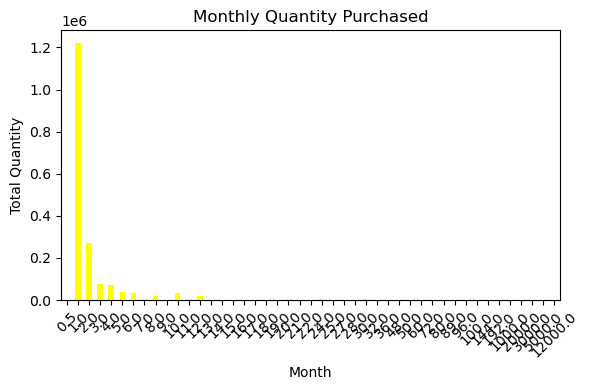

In [66]:
##MONTH WISE QUANTITY PURCHASED

# Group by month and sum the quantity-- chart representing
monthly_quantity = df.groupby(df1['QTY'])['VALUE'].sum()
plt.figure(figsize=(6, 4))
monthly_quantity.plot(kind='bar', color='yellow')
plt.title('Monthly Quantity Purchased')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Total Quantity')
plt.tight_layout()
plt.show()

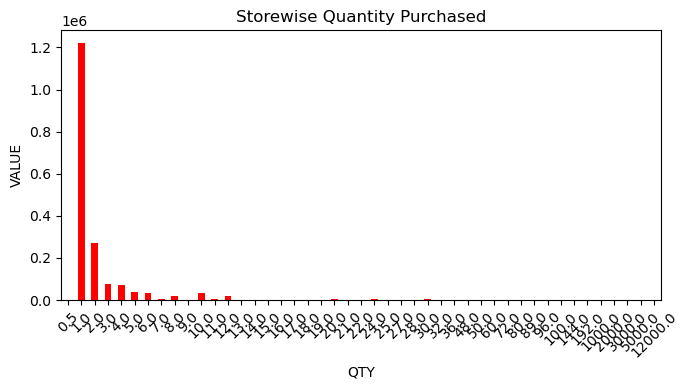

In [67]:
##STORE WISE QUANTITY PURCHASED

#Group by month and sum the quantity--- chart visualization
monthly_quantity = df1.groupby(df['QTY'])['VALUE'].sum()
plt.figure(figsize=(7, 4))
monthly_quantity.plot(kind='bar', color='red')
plt.title('Storewise Quantity Purchased')
plt.xlabel('QTY')
plt.xticks(rotation=45)
plt.ylabel('VALUE')
plt.tight_layout()
plt.show()

In [69]:
###MOST PURCHASED ITEM 

#--grouping columns
item_quantity = df1.groupby(['GRP', 'SGRP', 'SSGRP'])['QTY'].sum()

# Sort items by total quantity in descending order
item_quantity_sorted = item_quantity.sort_values(ascending=False)

#most purchase item display
most_purchased_item = item_quantity_sorted.index[0]
most_purchased_item = ' - '.join(most_purchased_item)
print("\nMost purchased item:\n", most_purchased_item)


Most purchased item:
 REFINED EDIBLE OILS-ALL PACKS - SUN FLOWER - SUN FLOWER


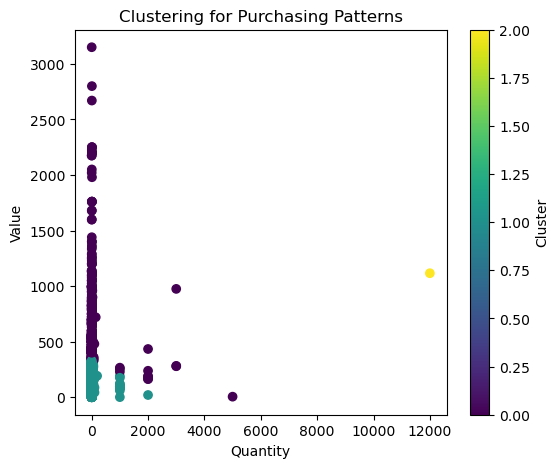

In [57]:
#optimal cluster
optimal_k = 3  
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters
plt.figure(figsize=(6, 5))
plt.scatter(df['QTY'], df['VALUE'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Quantity')
plt.ylabel('Value')
plt.title('Clustering for Purchasing Patterns')
plt.colorbar(label='Cluster')
plt.show()

<Axes: >

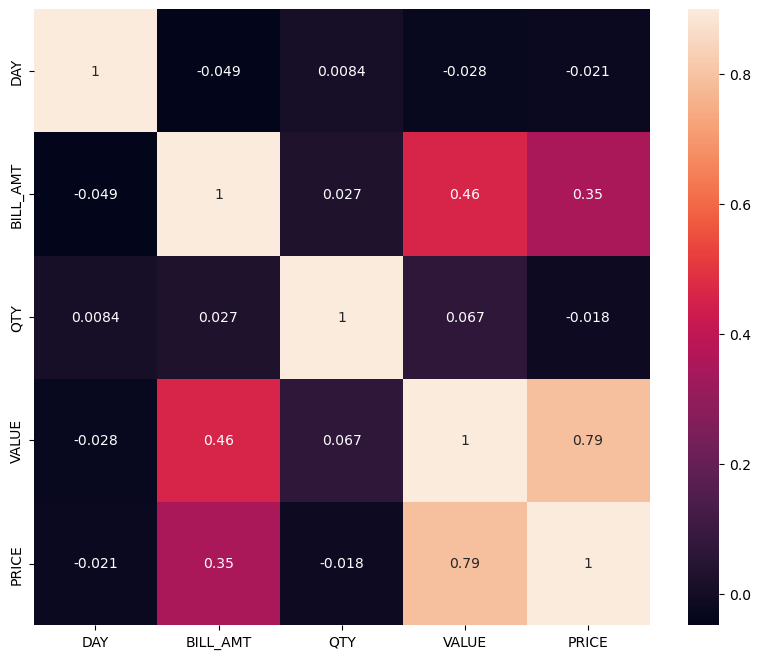

In [78]:
#heatmap_corelation
cm = df1[[ 'DAY',  'BILL_AMT', 'QTY', 'VALUE',
       'PRICE']].corr()
f, ax = plt.subplots(figsize = (10,8))
sns.heatmap(cm, vmax=0.9, square = True, annot = True)

In [79]:
yearly_totals = df1.groupby('DAY')['BILL_AMT'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_totals['DAY'], yearly_totals['BILL_AMT'], marker='o', linestyle='-', color='blue')
plt.title('SALES ANALYSIS OF SUPERMARKET IN A MONTH')
plt.xlabel('DA

YS OF MONTH')
plt.ylabel('TOTAL BILL AMOUNT')
plt.grid(True)
plt.show()



SyntaxError: unterminated string literal (detected at line 6) (3517420722.py, line 6)

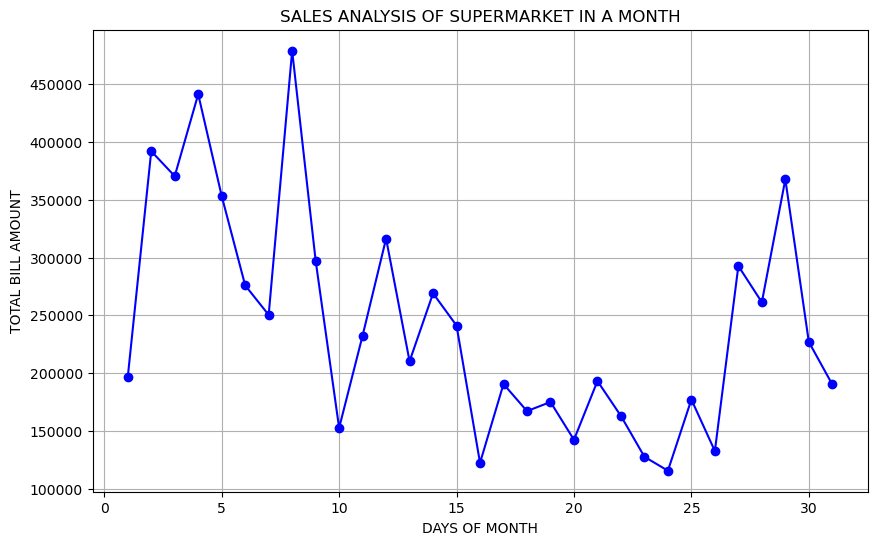

In [81]:


yearly_totals = df1.groupby('DAY')['BILL_AMT'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_totals['DAY'], yearly_totals['BILL_AMT'], marker='o', linestyle='-', color='blue')
plt.title('SALES ANALYSIS OF SUPERMARKET IN A MONTH')
plt.xlabel('DAYS OF MONTH')
plt.ylabel('TOTAL BILL AMOUNT')
plt.grid(True)
plt.show()



In [82]:


total_sales_by_category = df1.groupby('GRP')['BILL_AMT'].sum().reset_index()

TOP_5_SALES = total_sales_by_category.sort_values(by='BILL_AMT', ascending=False).head(5)

print(TOP_5_SALES)



                              GRP    BILL_AMT
11     BISCUITS - CORE & NON CORE  1169416.53
68                 SPICES (03/04)   516804.72
79        WASHING POWDERS/LIQUIDS   472523.14
52                   PACKAGED TEA   468254.34
57  REFINED EDIBLE OILS-ALL PACKS   377735.27


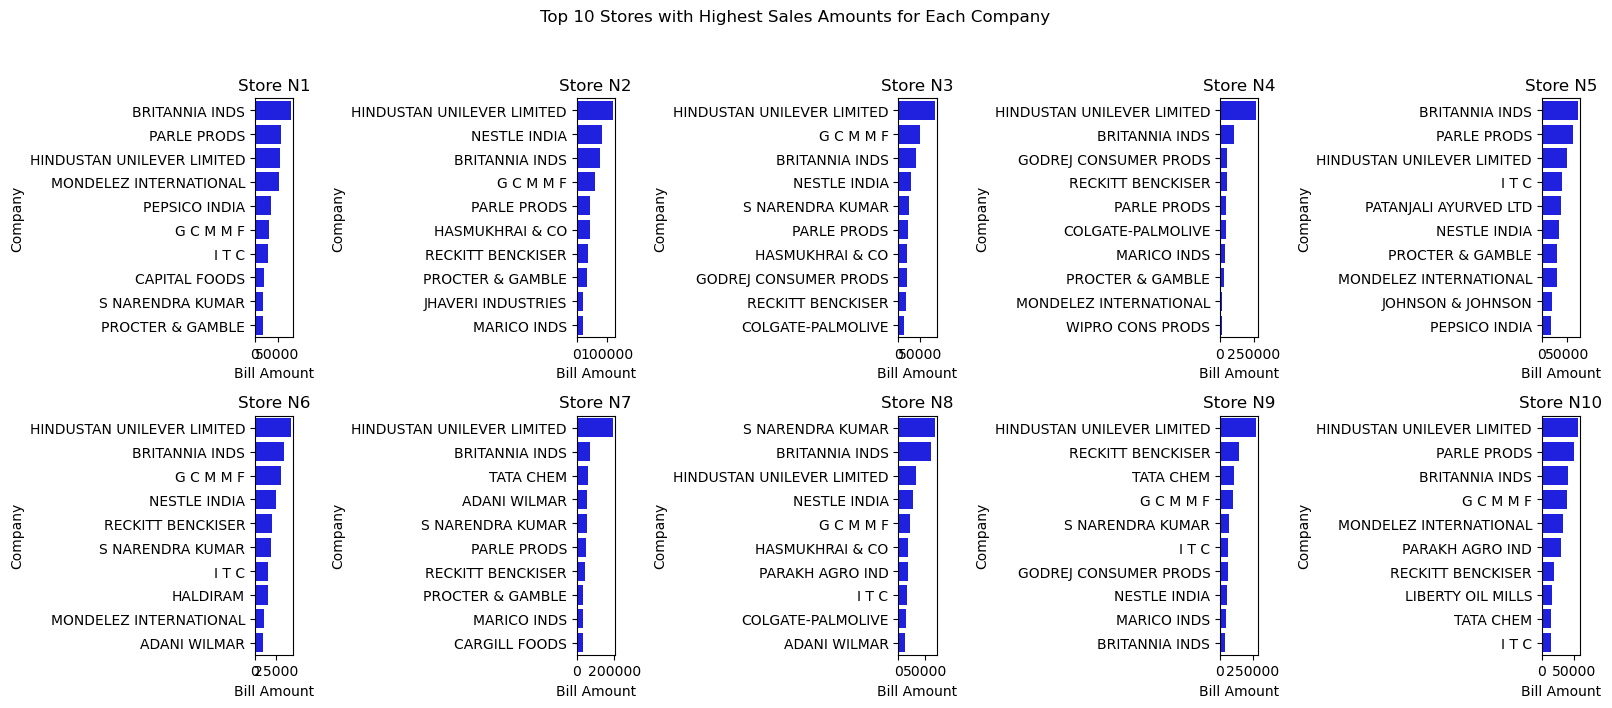

In [91]:
top_stores_by_company = pd.DataFrame(columns=['STORECODE', 'CMP', 'BILL_AMT'])


unique_storecodes = df1['STORECODE'].unique()

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(16, 8))
fig.suptitle('Top 10 Stores with Highest Sales Amounts for Each Company')

# Loop through each unique store code
for i, storecode in enumerate(unique_storecodes[:10]):  # Assuming you want the top 10 stores
    # Filter data for the current store code
    store_data = df1[df1['STORECODE'] == storecode]

    # Group by company and sum the bill amounts
    top_companies = store_data.groupby('CMP')['BILL_AMT'].sum().reset_index()

    # Sort by bill amounts in descending order and take the top 10
    top_companies = top_companies.sort_values(by='BILL_AMT', ascending=False).head(10)

    top_companies['STORECODE'] = storecode


    # Concatenate the results
    top_stores_by_company = pd.concat([top_stores_by_company, top_companies], ignore_index=True)

    # Plot horizontal bar chart for the current store code
    row, col = i // 5, i % 5
    ax = axs[row, col]
    sns.barplot(x='BILL_AMT', y='CMP', data=top_companies, ax=ax, color='blue')
    ax.set_title(f'Store {storecode}')
    ax.set_xlabel('Bill Amount')
    ax.set_ylabel('Company')

# Adjust layout
plt.tight_layout(rect=[0, 0.10, 1, 0.95])
plt.show()



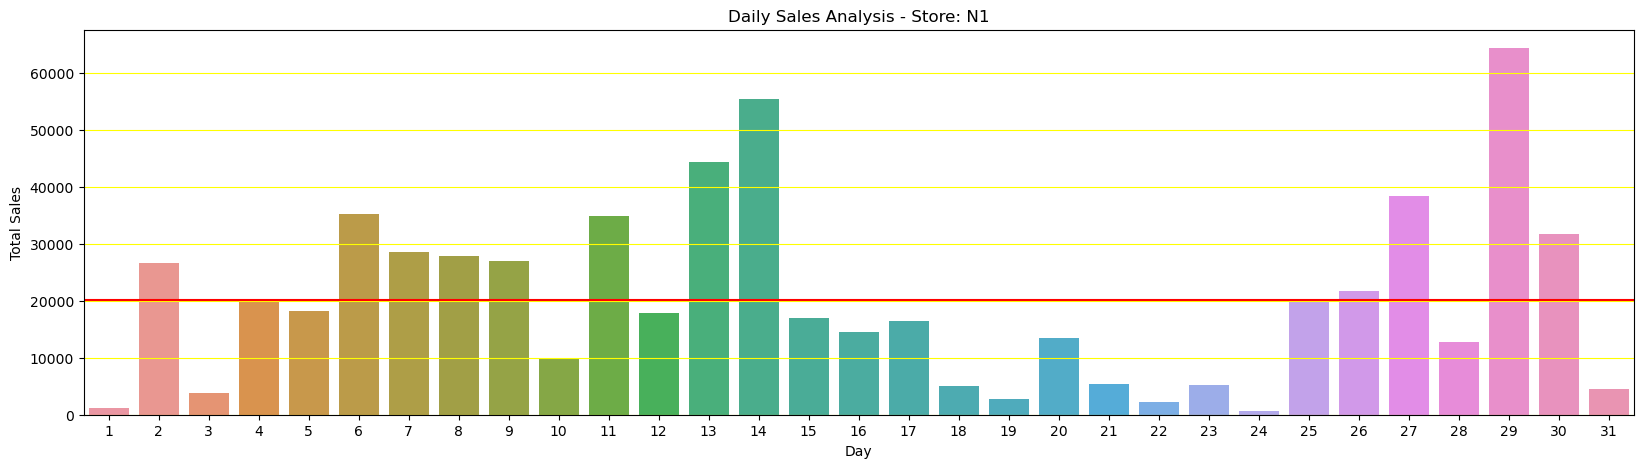

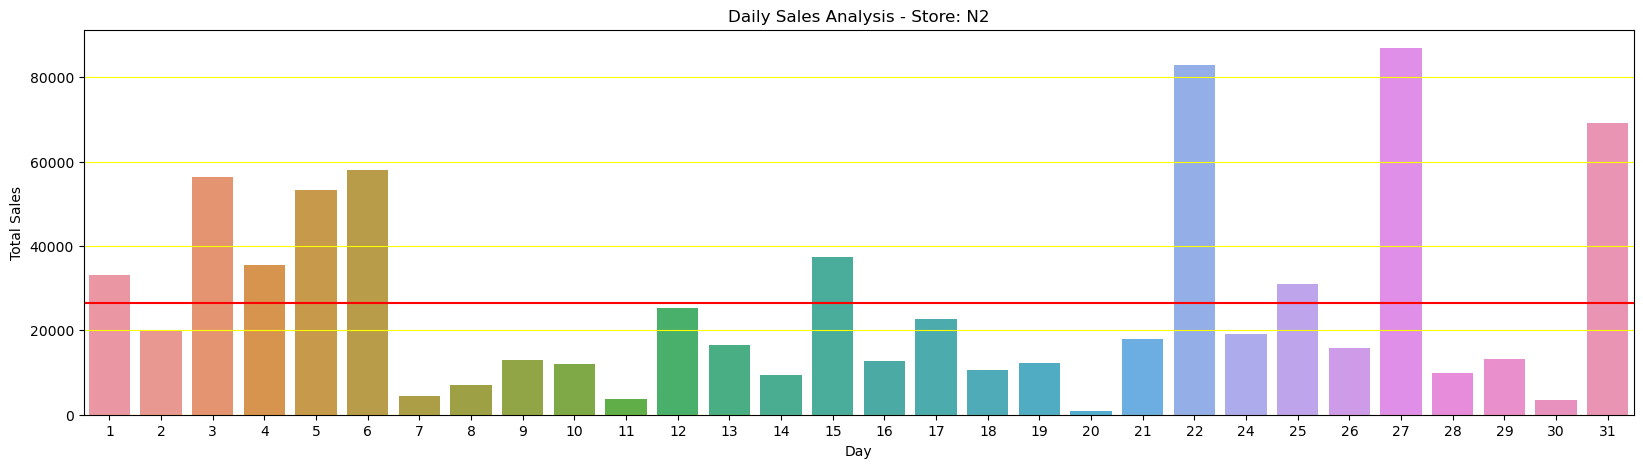

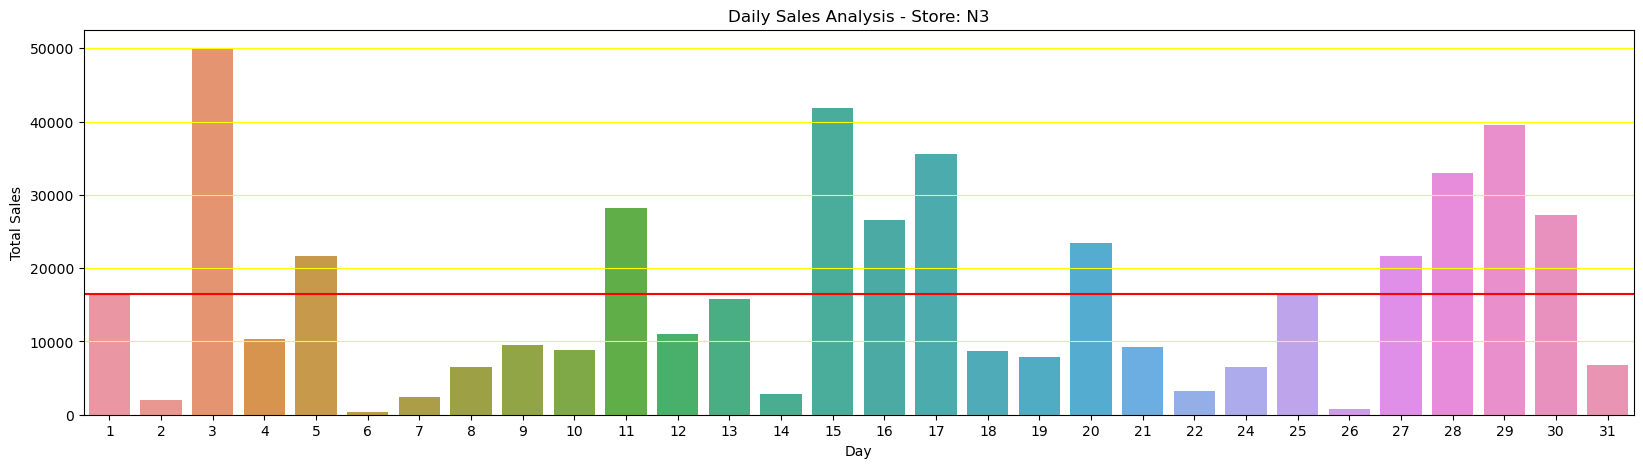

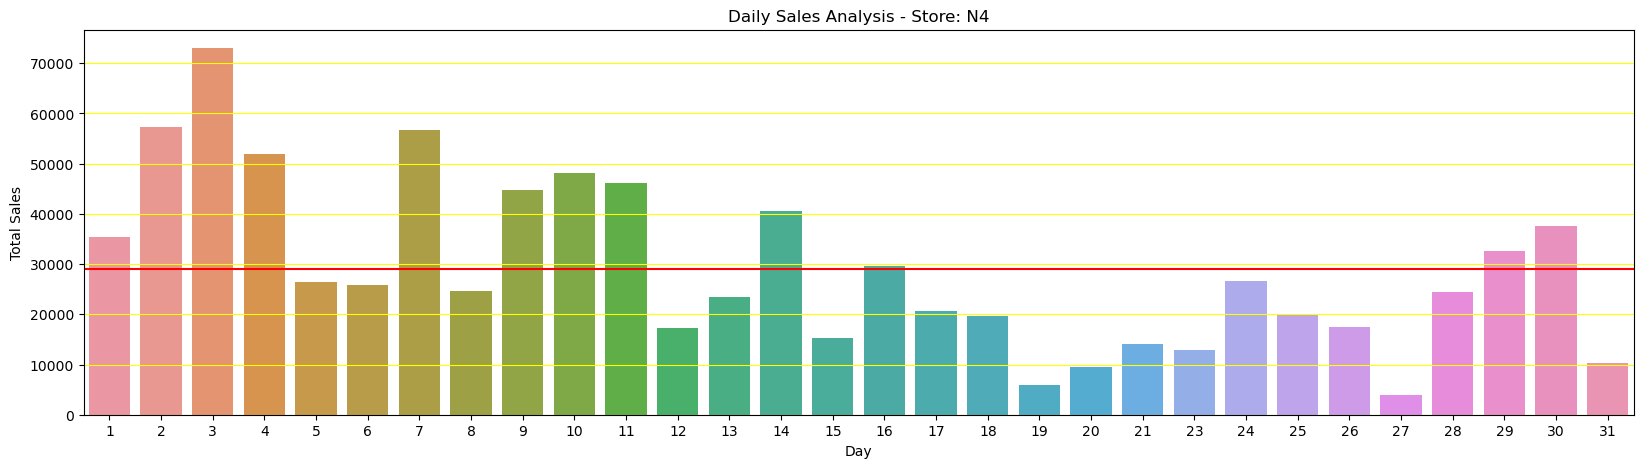

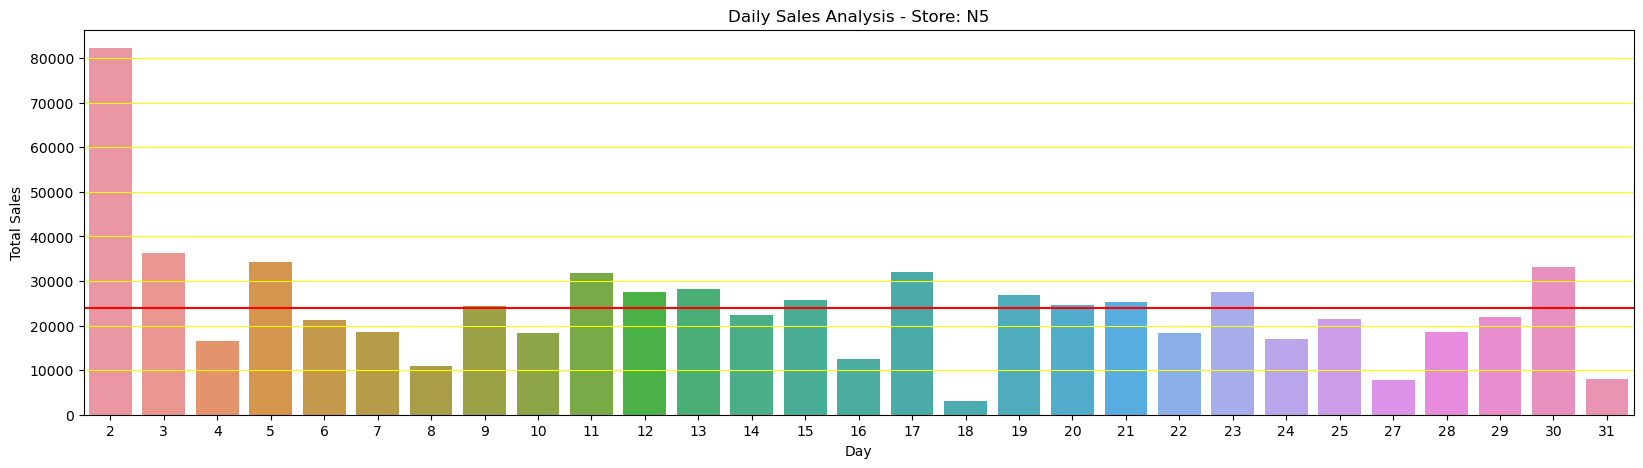

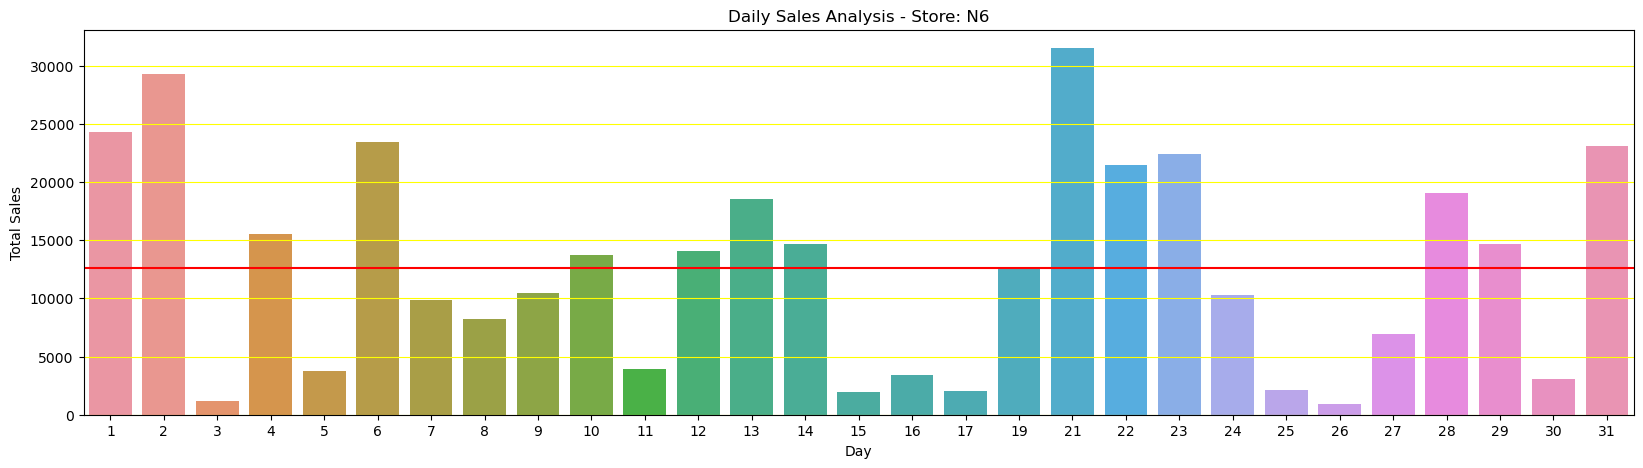

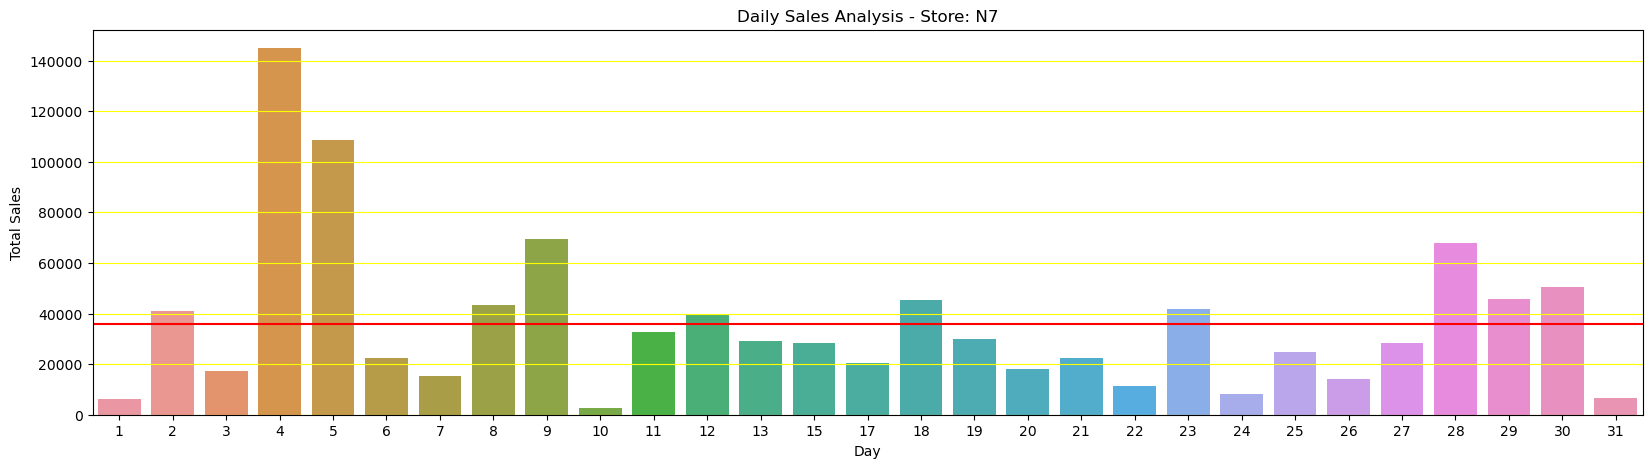

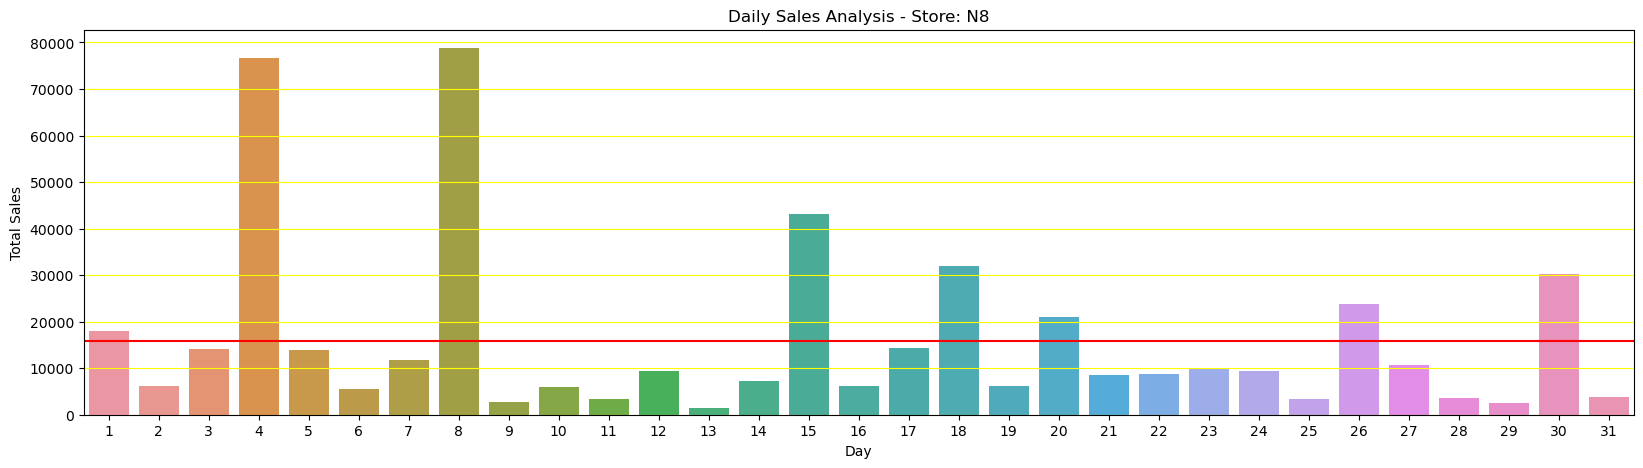

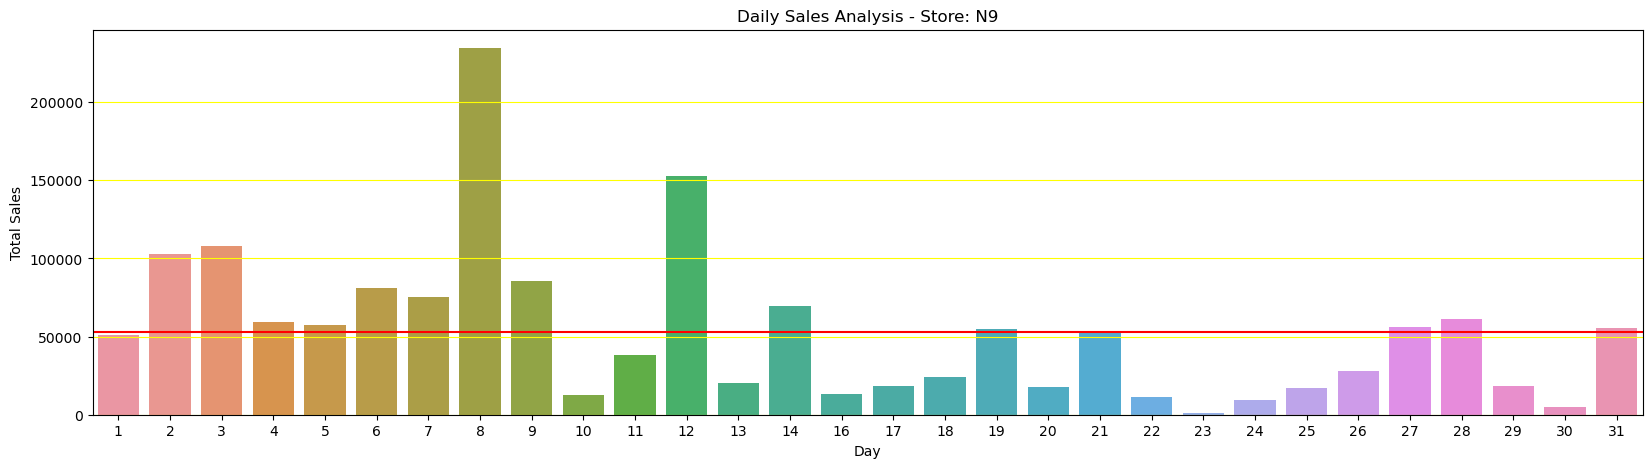

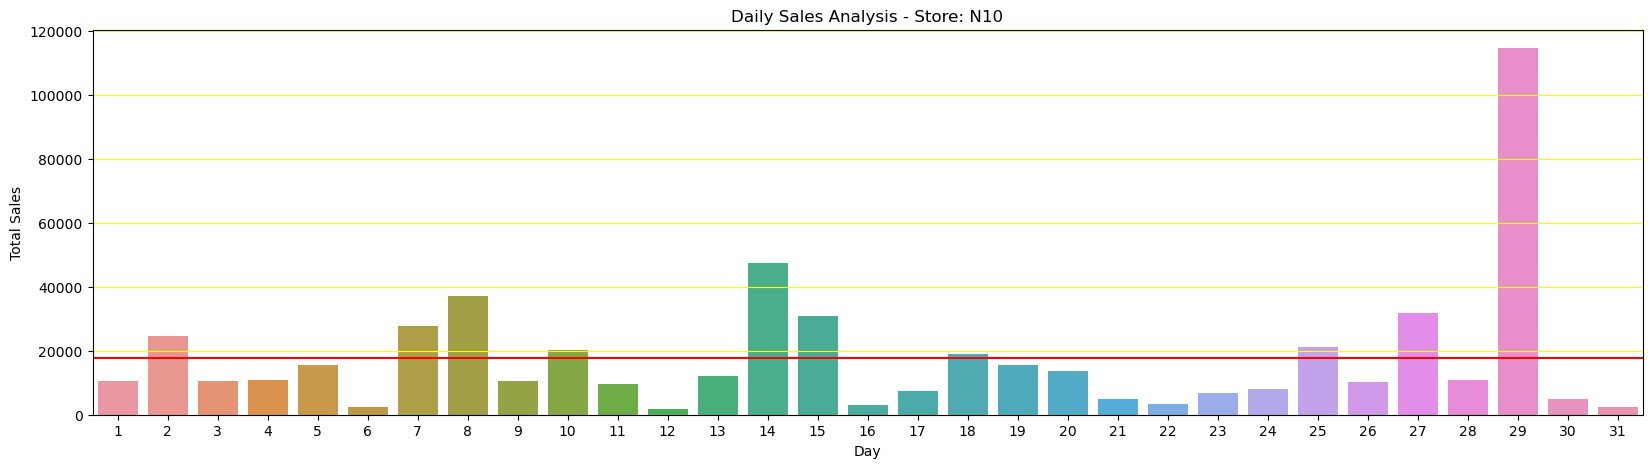

In [94]:


#DAILY SALES ANALYSIS FOR EACH STORE

for i, storecode in enumerate(unique_storecodes[:10]): 
    store_data = df1[df1['STORECODE'] == storecode]
    daily_sales = store_data.groupby("DAY")["BILL_AMT"].sum().reset_index()

    plt.figure(figsize=(20, 5))
    sns.barplot(x=daily_sales['DAY'], y=daily_sales['BILL_AMT']).axhline(daily_sales['BILL_AMT'].mean(), color='red')
    plt.title("Daily Sales Analysis - Store: " + str(storecode))
    plt.xlabel("Day")
    plt.ylabel("Total Sales")
    plt.grid(axis='y', color='yellow')
    plt.show()



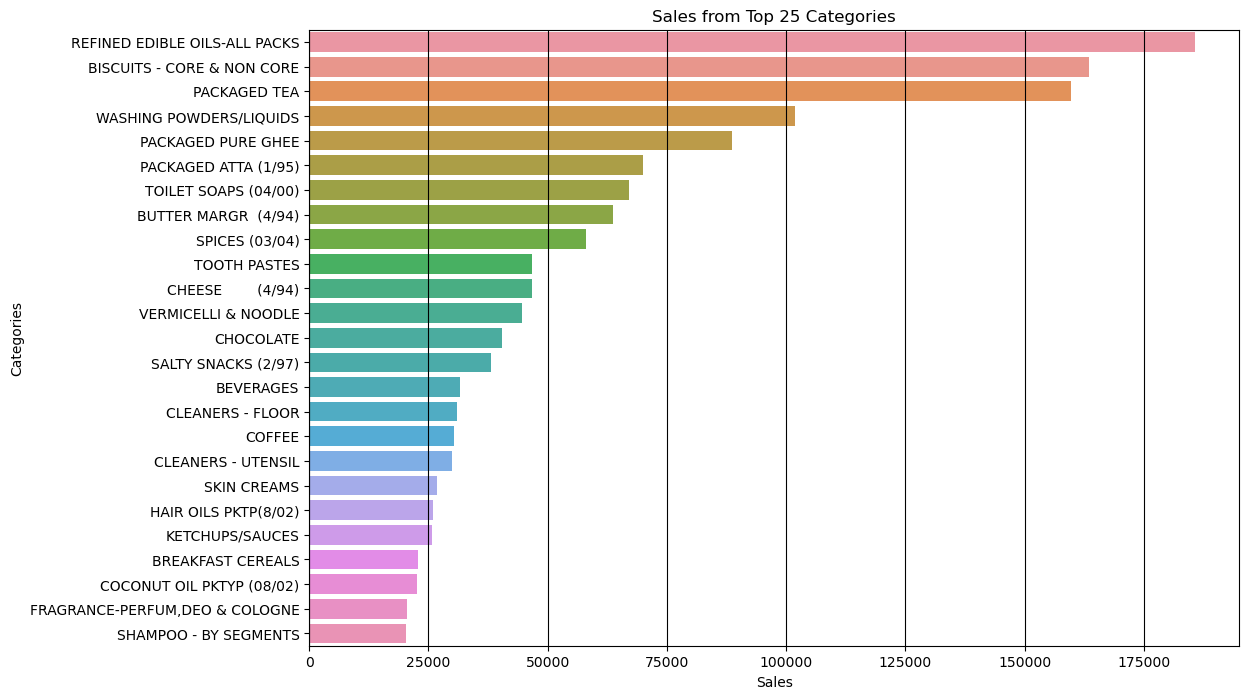

In [95]:

top_items_sales = df1.groupby('GRP').sum().sort_values("VALUE",ascending=False)[['QTY','PRICE','VALUE']][0:25]
plt.figure(figsize=(12,8))
sns.barplot(x='VALUE',y=top_items_sales.index,data=top_items_sales)
plt.title("Sales from Top 25 Categories")
plt.xlabel("Sales")
plt.ylabel("Categories")
plt.grid(axis='x',color='black');



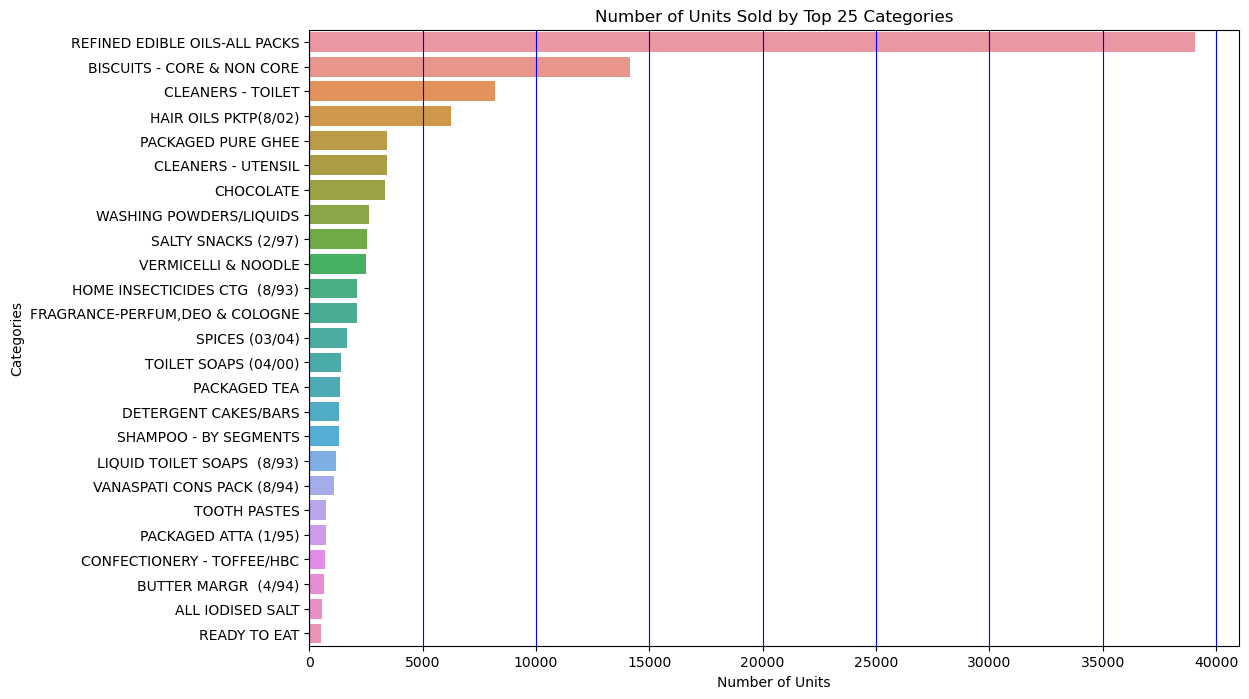

In [97]:
top_items = df1.groupby('GRP').sum().sort_values("QTY",ascending=False)[['QTY','PRICE']][0:25]
plt.figure(figsize=(12,8))
sns.barplot(x='QTY',y=top_items.index,data=top_items)
plt.title(

"Number of Units Sold by Top 25 Categories")
plt.xlabel("Number of Units")
plt.ylabel("Categories")
plt.grid(axis='x',color='blue')



Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      5379

    accuracy                           1.00      5379
   macro avg       1.00      1.00      1.00      5379
weighted avg       1.00      1.00      1.00      5379

Confusion Matrix:
[[5379]]


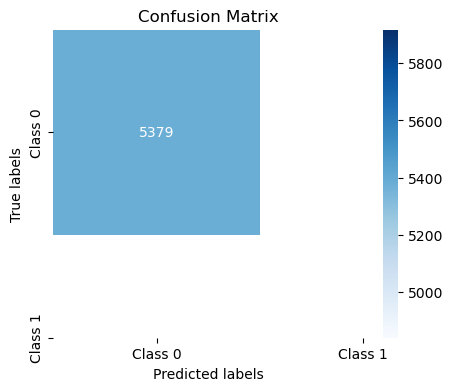

In [59]:
###RANDOM FOREST CLASSIFIER

#extra column binary col for detecting purchase
df['PurchaseDecision'] = df['QTY'].apply(lambda x: 1 if x > 0 else 0) 

X = df.drop(['PurchaseDecision', 'BILL_ID'], axis=1)  #target value
y = df['PurchaseDecision']

X_encoded = pd.get_dummies(X, columns=['MONTH', 'STORECODE', 'GRP', 'SGRP', 'SSGRP', 'CMP', 'MBRD', 'BRD'])

# datsset spliting
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Assuming y_pred and y_true are your predicted and true labels
conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
